# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


In [3]:
from pprint import pprint

test_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={cities[0]}"
pprint(requests.get(test_url).json())

{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': -43.9535, 'lon': -176.5597},
 'dt': 1699675237,
 'id': 4032804,
 'main': {'feels_like': 283.48,
          'humidity': 83,
          'pressure': 1023,
          'temp': 284.16,
          'temp_max': 284.16,
          'temp_min': 284.16},
 'name': 'Waitangi',
 'sys': {'country': 'NZ',
         'id': 2040615,
         'sunrise': 1699719276,
         'sunset': 1699771564,
         'type': 2},
 'timezone': 49500,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 201, 'gust': 4.02, 'speed': 1.34}}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] 
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed'] 
        city_country = city_weather['sys']['country'] 
        city_date = city_weather['dt']

        ## Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | tufanganj
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | huilong
Processing Record 9 of Set 1 | andkhoy
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | pagar alam
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | imbituba
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | utrik
Processing Record 22 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,83,79,1.34,NZ,1699675237
1,hamilton,39.1834,-84.5333,8.38,58,0,0.89,US,1699675238
2,port-aux-francais,-49.3500,70.2167,3.16,82,100,13.64,TF,1699675238
3,bethel,41.3712,-73.4140,6.94,76,10,0.45,US,1699675239
4,isafjordur,66.0755,-23.1240,1.88,67,78,2.24,IS,1699675240


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,83,79,1.34,NZ,1699675237
1,hamilton,39.1834,-84.5333,8.38,58,0,0.89,US,1699675238
2,port-aux-francais,-49.3500,70.2167,3.16,82,100,13.64,TF,1699675238
3,bethel,41.3712,-73.4140,6.94,76,10,0.45,US,1699675239
4,isafjordur,66.0755,-23.1240,1.88,67,78,2.24,IS,1699675240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

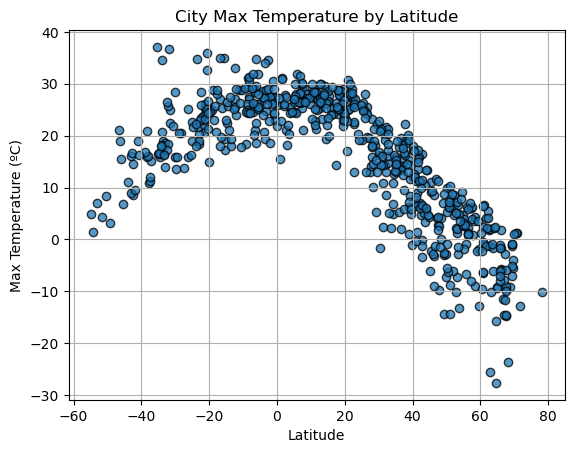

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],alpha=0.75,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (ºC)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

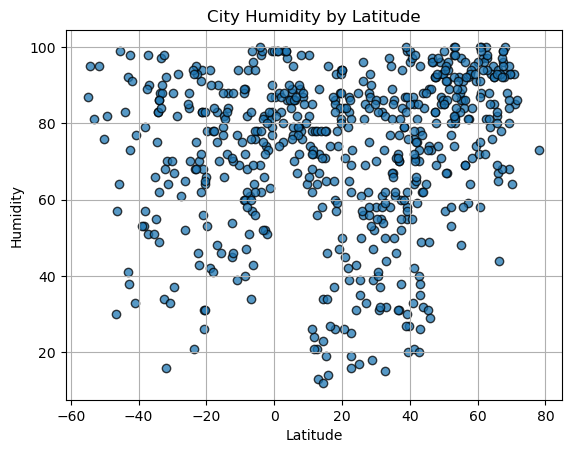

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],alpha=0.75,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

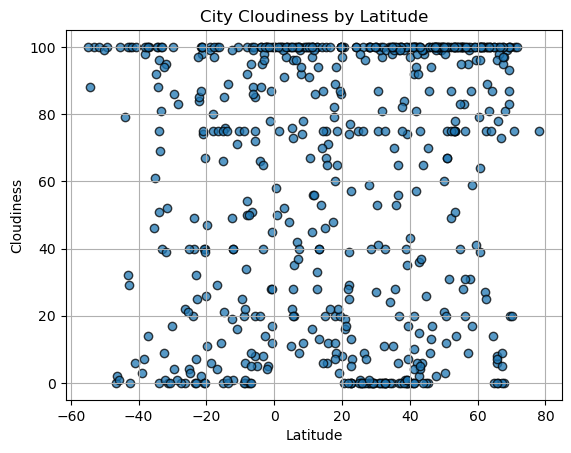

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],alpha=0.75,edgecolors='black')


# Incorporate the other graph properties
plt.title("City Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

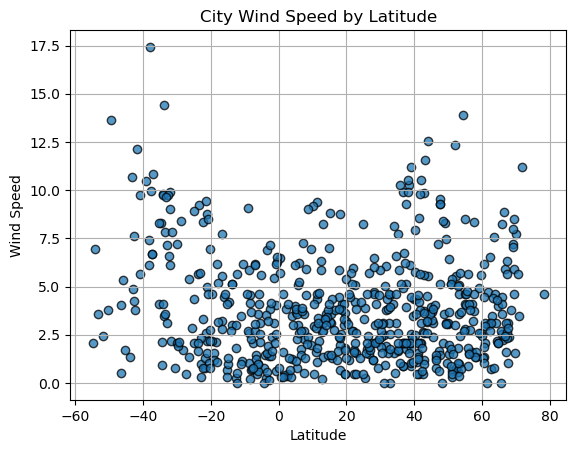

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],alpha=0.75,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Wind Speed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def get_regression(x_axis, y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    reg_plot = (slope * x_axis) + intercept

    eq_str = f"y = {round(slope,2)}x + {round(intercept,2)}"

    return {
        "slope": slope, 
        "intercept": intercept, 
        "rvalue": rvalue, 
        "pvalue": pvalue, 
        "stderr": stderr,
        "eq_str": eq_str,
        "reg_plot": reg_plot
        }
    
x_var = 'Lat'

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df[x_var] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,8.38,58,0,0.89,US,1699675238
3,bethel,41.3712,-73.4140,6.94,76,10,0.45,US,1699675239
4,isafjordur,66.0755,-23.1240,1.88,67,78,2.24,IS,1699675240
5,tufanganj,26.3167,89.6667,24.57,56,0,2.43,IN,1699675241
6,huilong,31.8111,121.6550,14.41,61,97,6.08,CN,1699675242


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df[x_var] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,83,79,1.34,NZ,1699675237
2,port-aux-francais,-49.3500,70.2167,3.16,82,100,13.64,TF,1699675238
8,adamstown,-25.0660,-130.1015,22.68,84,4,4.34,PN,1699675242
9,port mathurin,-19.6833,63.4167,25.05,78,11,4.61,MU,1699675242
10,pagar alam,-4.0167,103.2667,28.61,62,100,1.43,ID,1699675243


###  Temperature vs. Latitude Linear Regression Plot

The R value is -0.8859510617556386


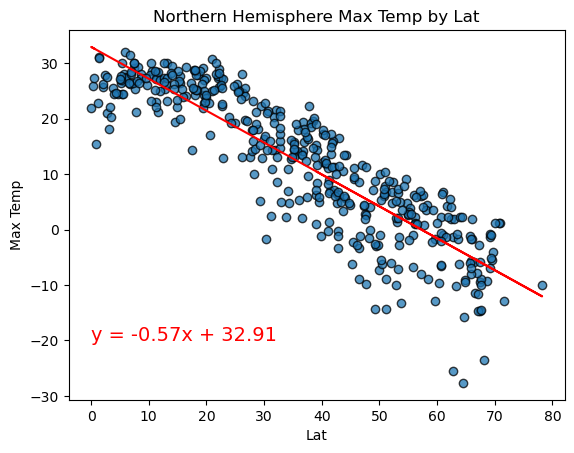

In [16]:
# Linear regression on Northern Hemisphere
y_var = 'Max Temp'
regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (0,-20), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is 0.6753688643256925


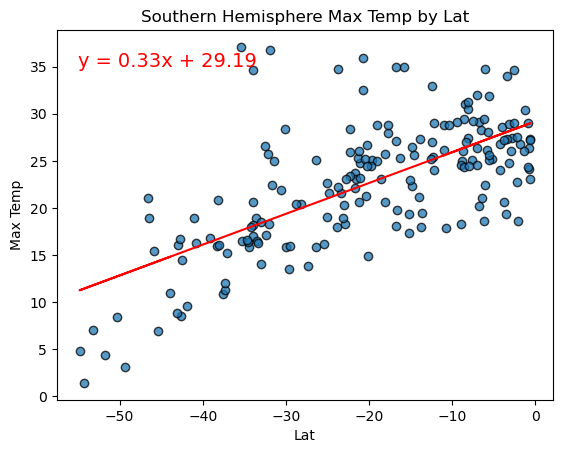

In [17]:
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-55, 35), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R value is 0.21795935774506647


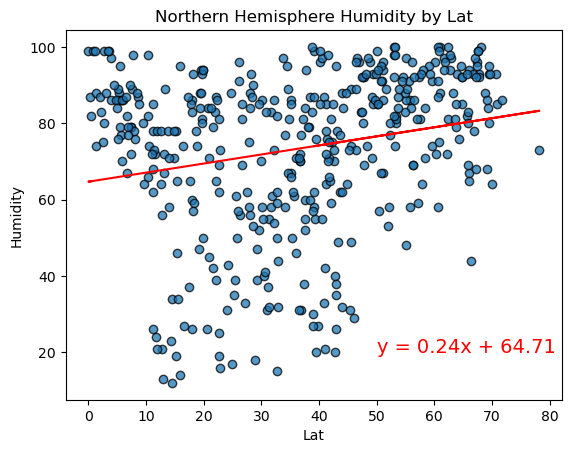

In [18]:
# Northern Hemisphere
y_var = 'Humidity'

regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (50,20), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is 0.01587922140526066


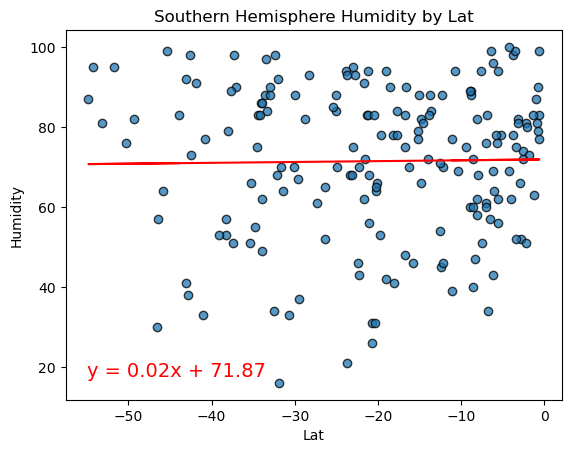

In [19]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-55, 17.5), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R value is 0.07928207498327237


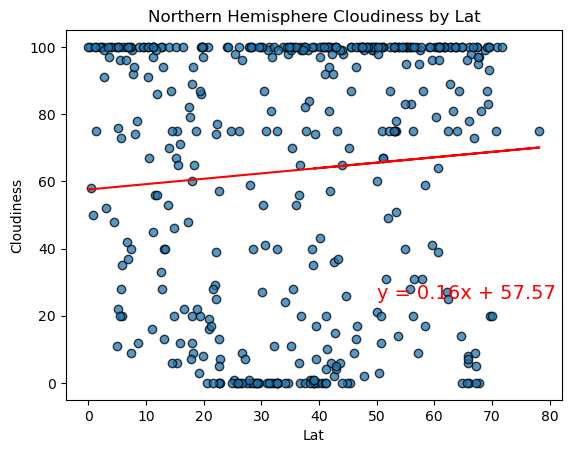

In [20]:
# Northern Hemisphere
y_var = 'Cloudiness'

regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (50,25), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is -0.07937434009086736


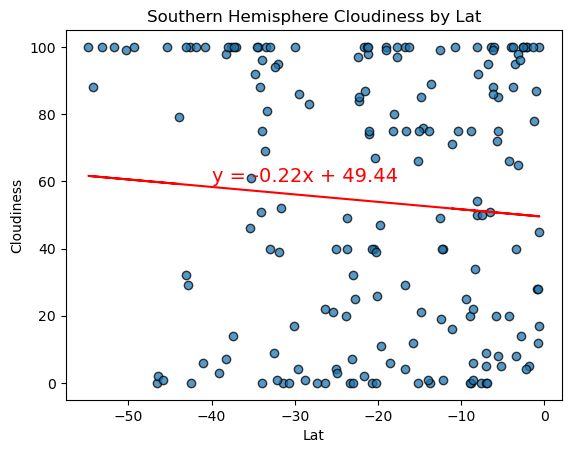

In [21]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-40, 60), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R value is 0.11015335215079626


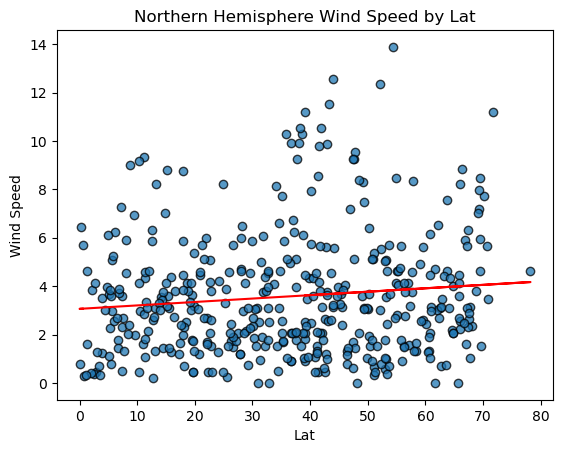

In [22]:
# Northern Hemisphere
y_var = 'Wind Speed'

regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (10, 15), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is -0.3967402047412337


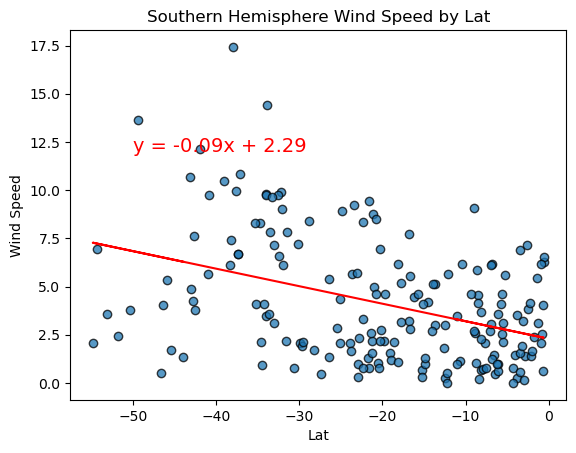

In [23]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-50, 12), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE